# Customer Personality Analysis Segmentation (Clustering)

##### Data Science use case: customer personality analysis k-means and agglomerative clustering



## What Is Customer Segmentation?
The purpose of customer segmentation is to divide customers into many different ways. Customers can be grouped by their demographic, behavior, lifestyle, psychographic, value, etc. Segmentation is mostly used for marketing, but there are other reasons to segment your customer base. Using customer segmentation in marketing means that you can target the right people with the right messaging about your products. This will increase the success of your marketing campaigns.

## Understanding The Data
Context
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

#### Content
People

ID: Customer’s unique identifier
Year_Birth: Customer’s birth year
Education: Customer’s education level
Marital_Status: Customer’s marital status
Income: Customer’s yearly household income
Kidhome: Number of children in customer’s household
Teenhome: Number of teenagers in customer’s household
Dt_Customer: Date of customer’s enrollment with the company
Recency: Number of days since customer’s last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise

#### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
#### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month
#### Goal
Need to perform clustering to summarize customer segments.


## Exploratory Data Analysis
Of course, first step is to import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/andhikaw789/Customer-Personality-Analysis/main/marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
from datetime import date
from datetime import datetime
data['Age'] = (2021 - data['Year_Birth'])
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
days_in_year = 365.2425
date_now = datetime.strptime('Jan 1 2021', '%b %d %Y')
data['Years_customer'] = (pd.Timestamp('now').year) - (pd.to_datetime(data['Dt_Customer']).dt.year)

In [4]:
data['Total_Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Total_Acc_Cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Years_customer          0
Total_Expenses          0
Total_Acc_Cmp           0
dtype: int64

In [7]:
data['ID'].nunique()

2240

Text(0.5, 1.0, 'Age')

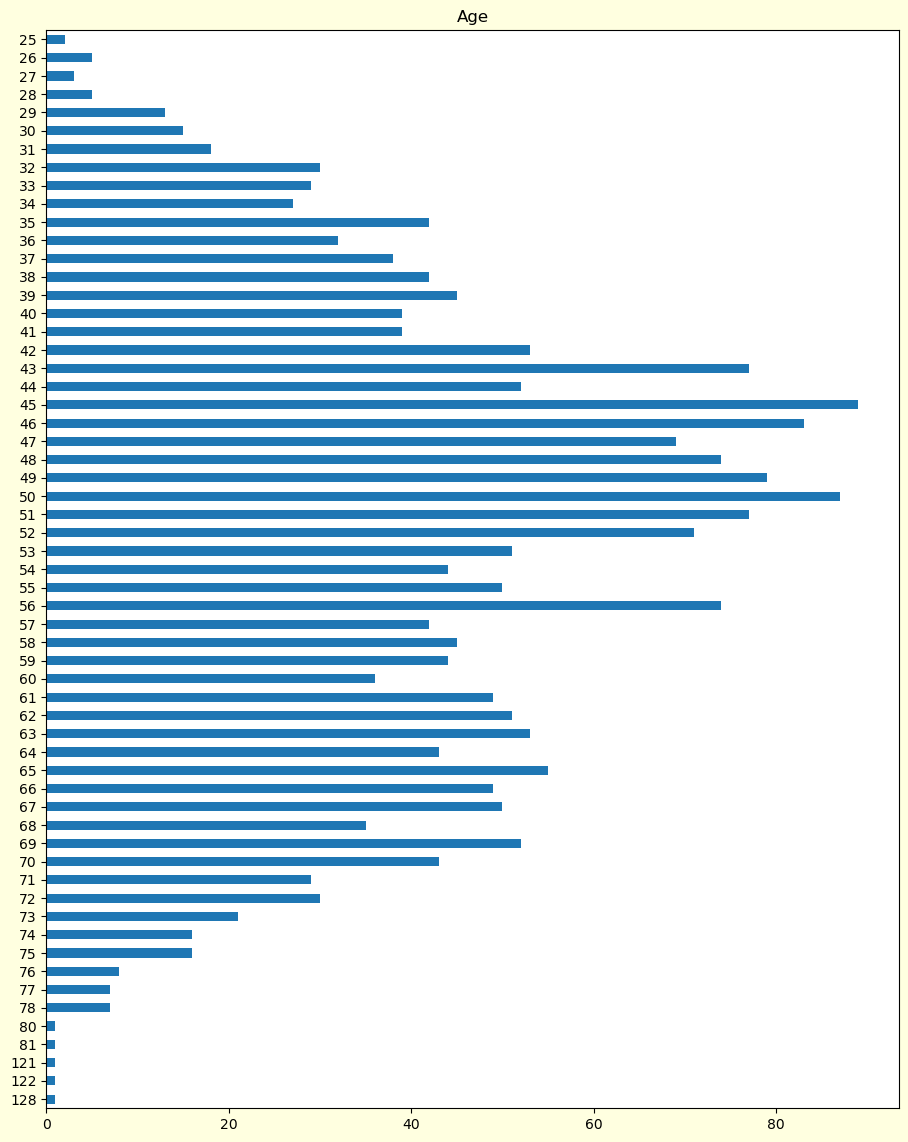

In [8]:
plt.figure(figsize=(11,14), facecolor='lightyellow')
data['Age'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Age')

Text(0.5, 1.0, 'Income')

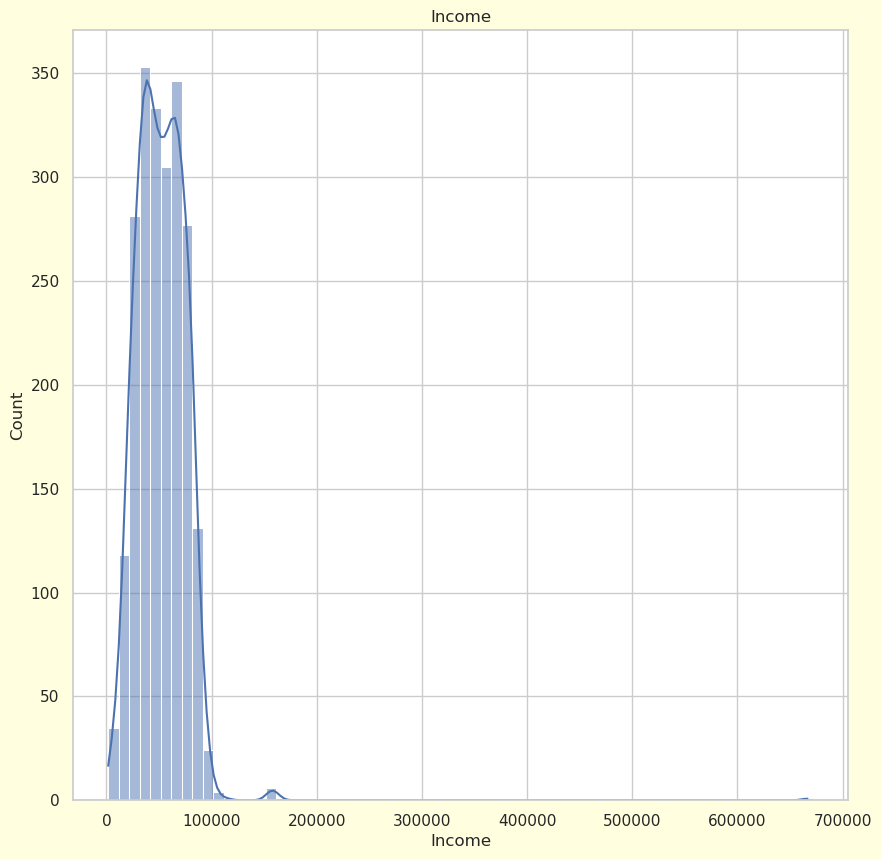

In [9]:
plt.figure(figsize=(10,10), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.histplot(data=data, x='Income', binwidth=10000, kde=True)
ax.set_title('Income')

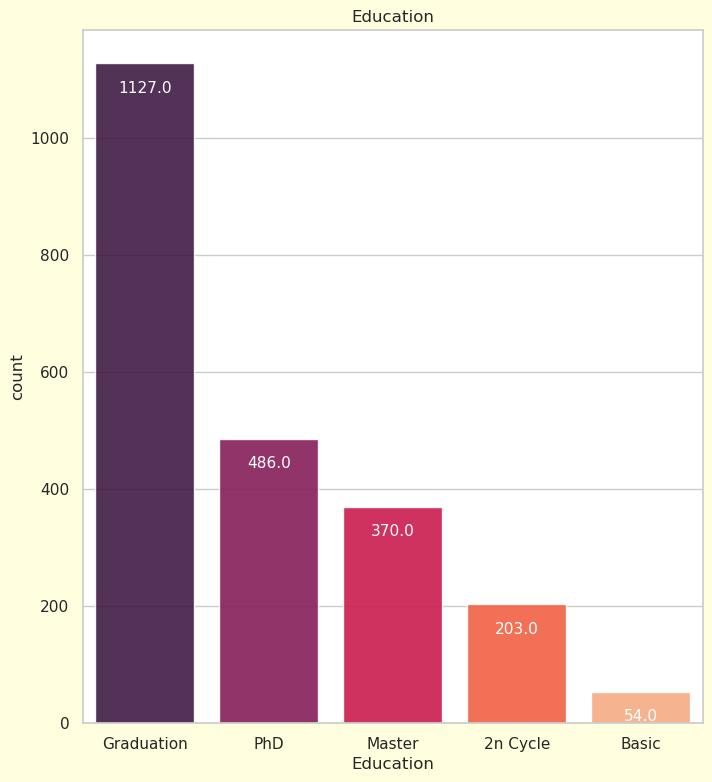

In [12]:
plt.figure(figsize=(8, 9), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Education', saturation=1, alpha=0.9, palette='rocket', order=data['Education'].value_counts().index)
ax.set_title('Education')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)
plt.show()

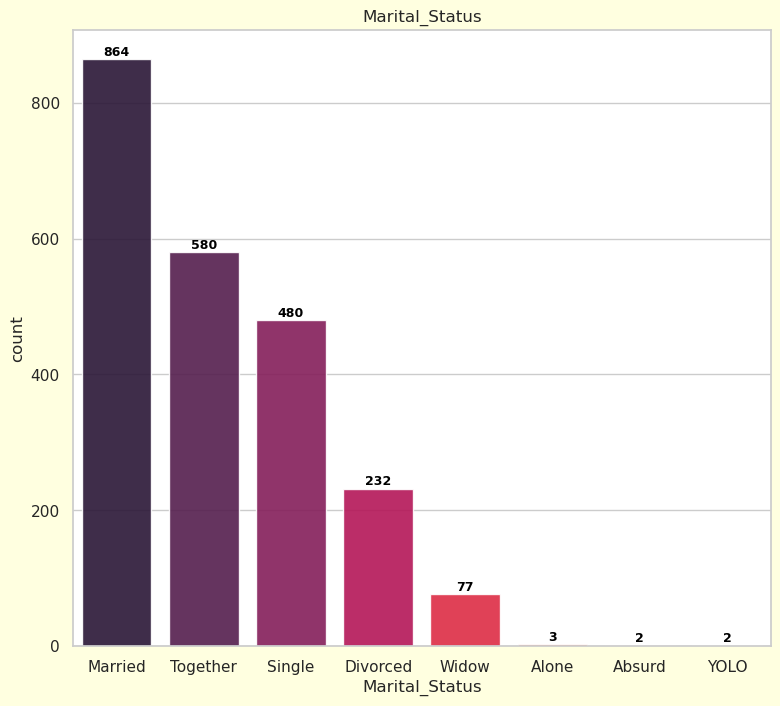

In [14]:
plt.figure(figsize=(9, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Marital_Status', saturation=1, alpha=0.9, palette='rocket', order=data['Marital_Status'].value_counts().index)
ax.set_title('Marital_Status')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=9)

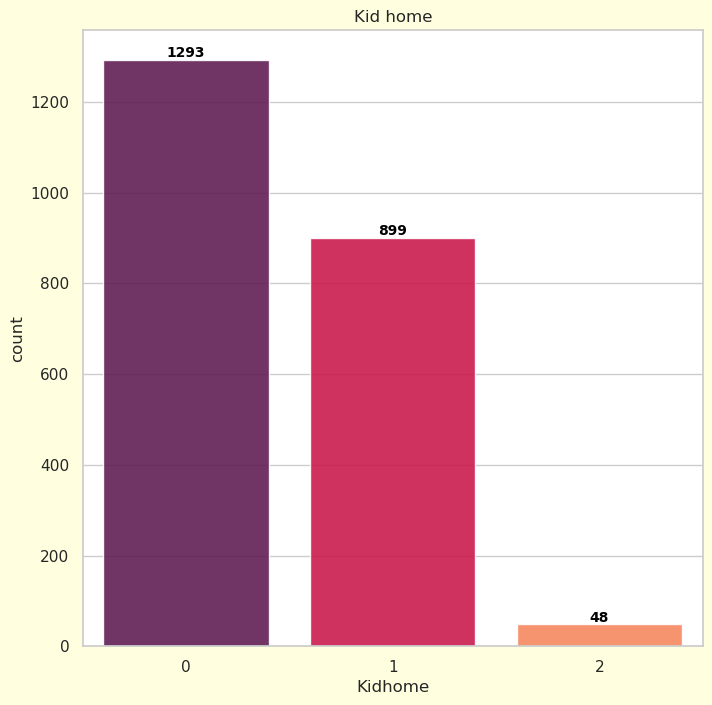

In [16]:
plt.figure(figsize=(8, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Kidhome', saturation=1, alpha=0.9, palette='rocket', order=data['Kidhome'].value_counts().index)
ax.set_title('Kid home')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=10)

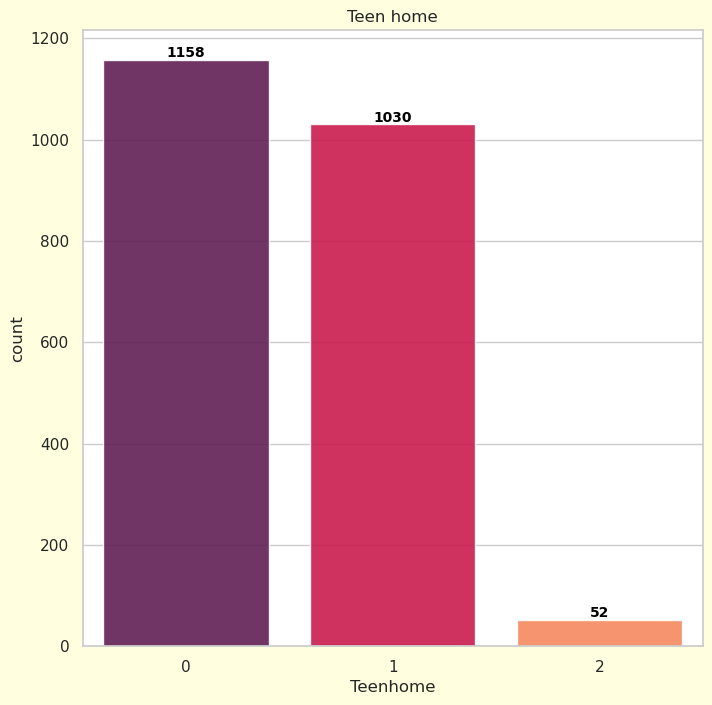

In [18]:
plt.figure(figsize=(8, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Teenhome', saturation=1, alpha=0.9, palette='rocket', order=data['Teenhome'].value_counts().index)
ax.set_title('Teen home')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=10)

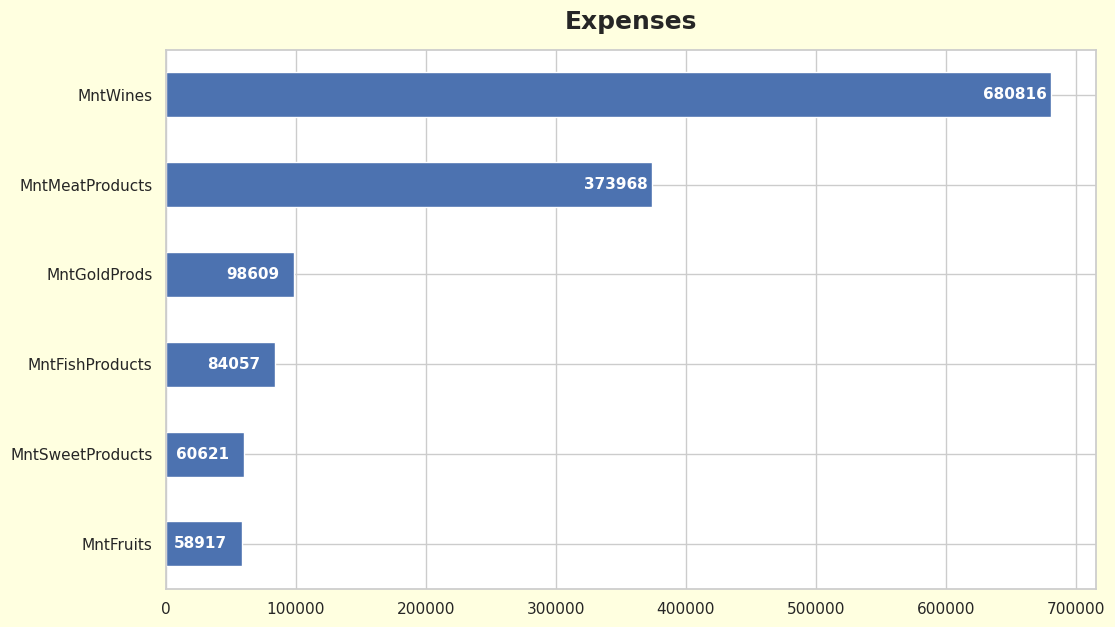

In [20]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
                 textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')

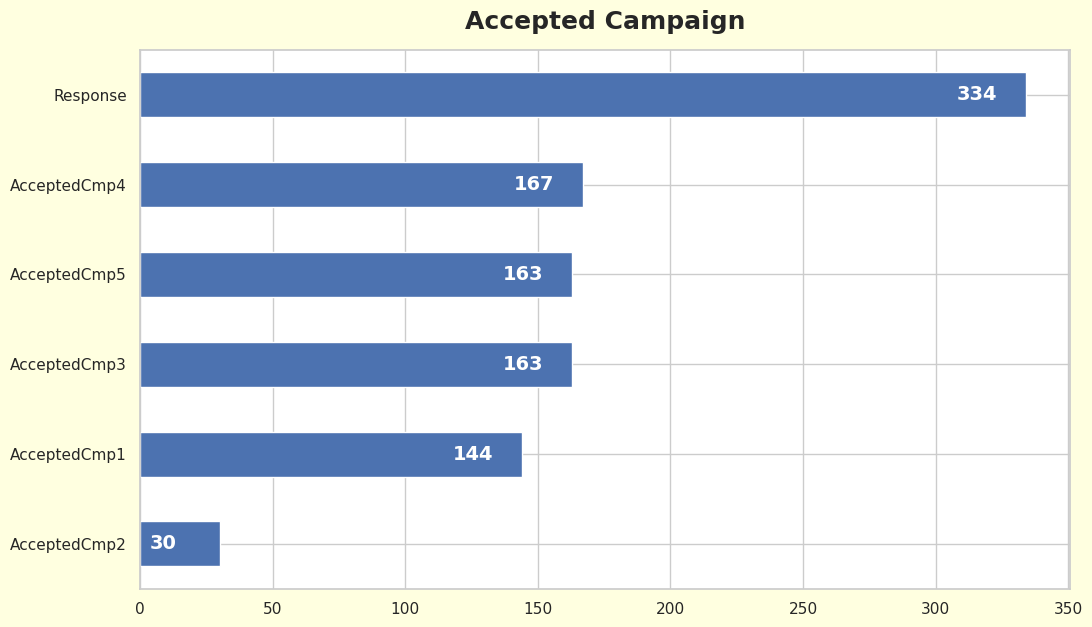

In [21]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Accepted Campaign', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-50, 0),
                 textcoords='offset points', va='center', ha='left', color = 'white', fontsize=14, fontweight='semibold')

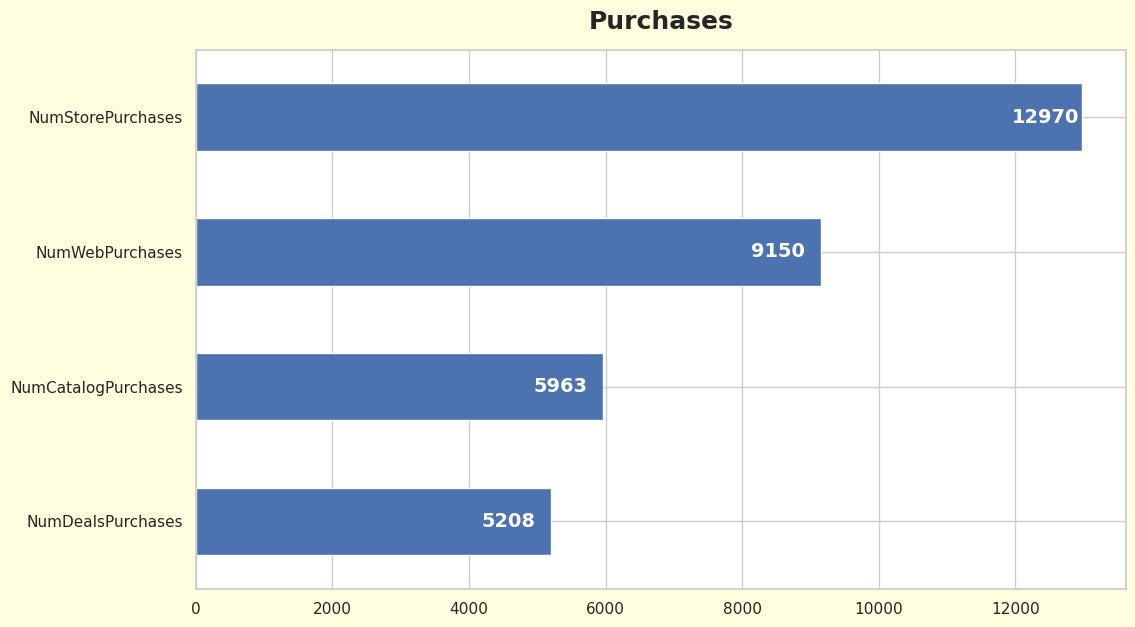

In [22]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Purchases', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-50, 0),
                 textcoords='offset points', va='center', ha='left', color = 'white', fontsize=14, fontweight='semibold')


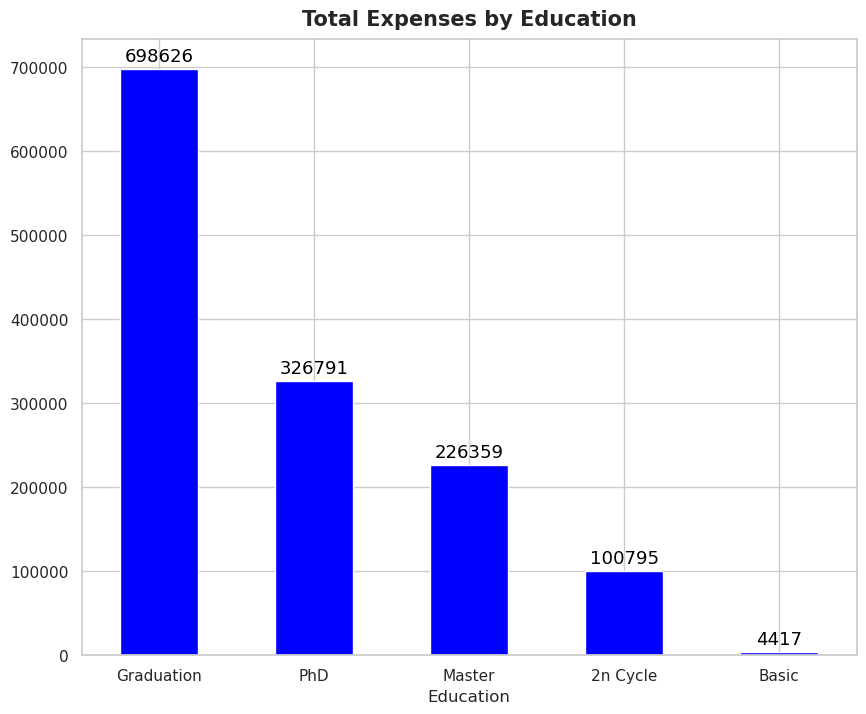

In [24]:
sns.set(style='whitegrid')
ax = data[['Education','Total_Expenses']].groupby('Education').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', figsize=(10,8), legend=None, color='blue')
plt.xticks(rotation=360)
plt.title('Total Expenses by Education', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

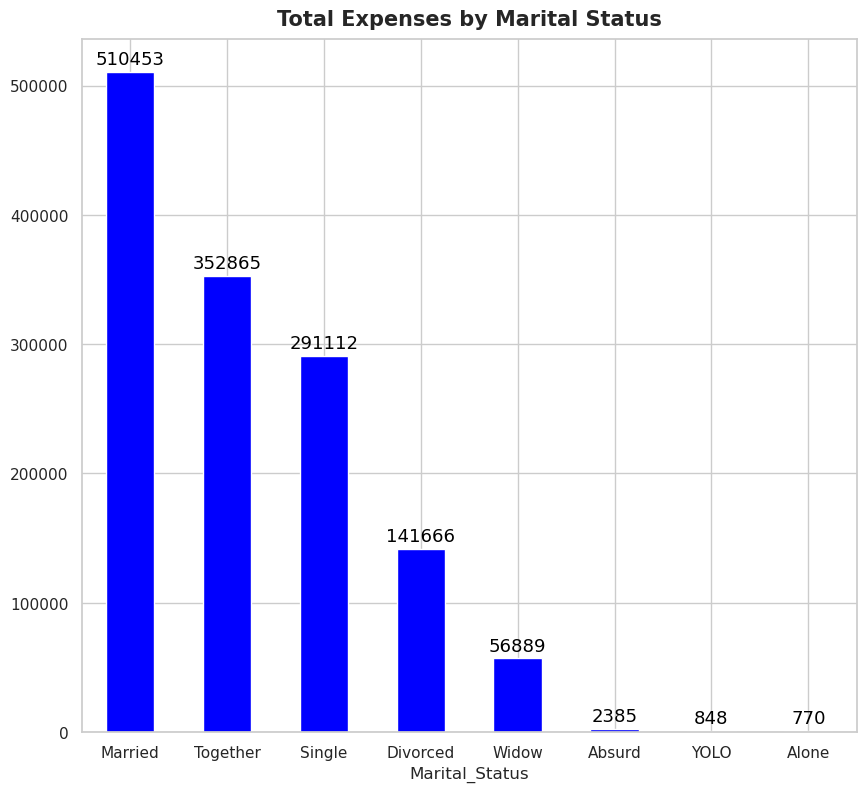

In [25]:
sns.set(style='whitegrid')
ax = data[['Marital_Status','Total_Expenses']].groupby('Marital_Status').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', color='blue', figsize=(10,9), legend=None)
plt.xticks(rotation=360)
plt.title('Total Expenses by Marital Status', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

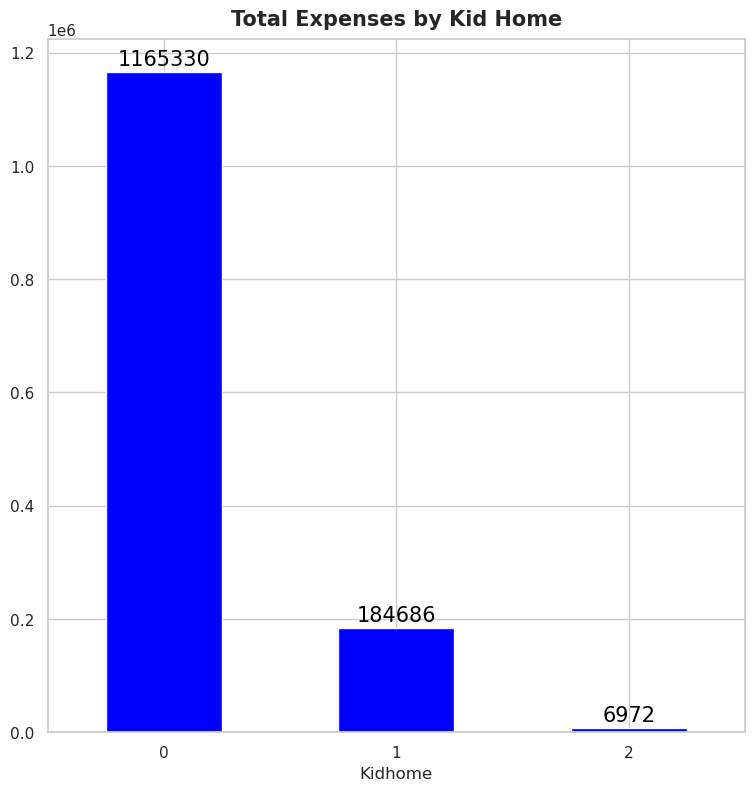

In [26]:
sns.set(style='whitegrid')
ax = data[['Kidhome','Total_Expenses']].groupby('Kidhome').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', color='blue', figsize=(9,9), legend=None)
plt.xticks(rotation=360)
plt.title('Total Expenses by Kid Home', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0,9), textcoords='offset points', color='black', fontsize=15)

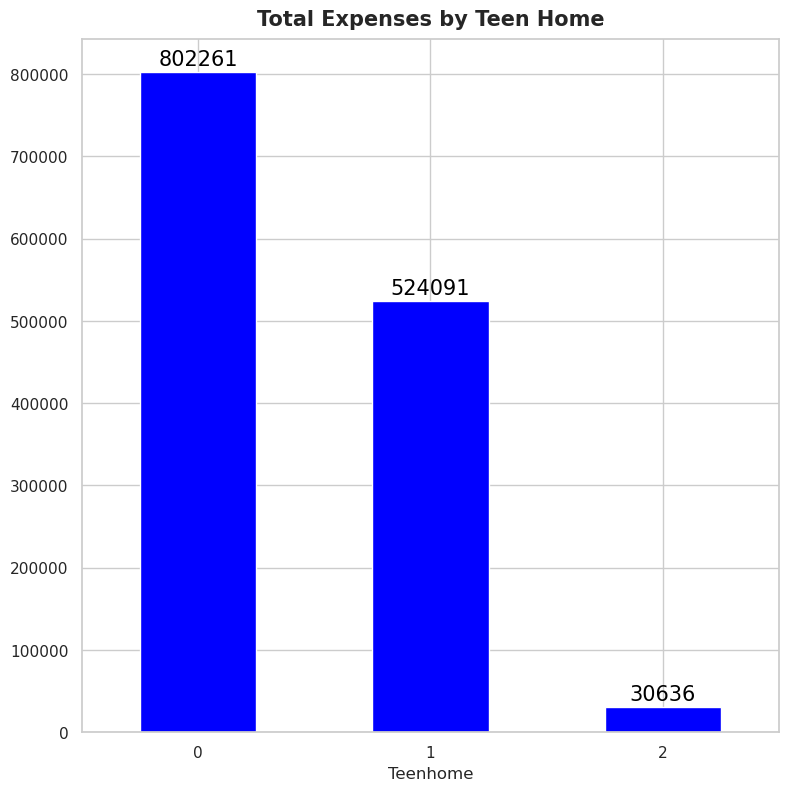

In [27]:
sns.set(style='whitegrid')
ax = data[['Teenhome','Total_Expenses']].groupby('Teenhome').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', color='blue', figsize=(9,9), legend=None)
plt.xticks(rotation=360)
plt.title('Total Expenses by Teen Home', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0,9), textcoords='offset points', color='black', fontsize=15)

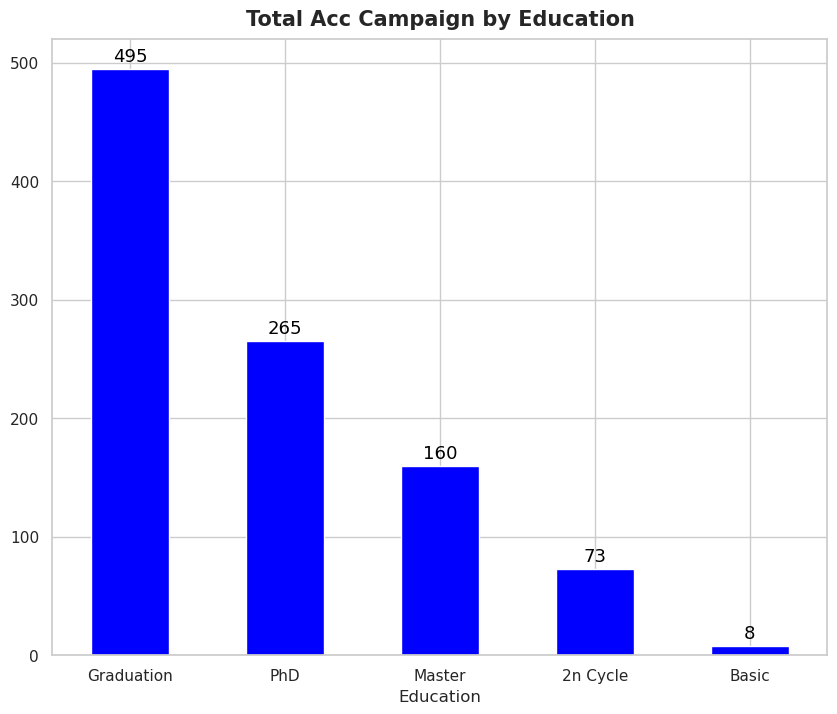

In [31]:
sns.set(style='whitegrid')
ax = data[['Education','Total_Acc_Cmp']].groupby('Education').sum().sort_values(by='Total_Acc_Cmp', ascending=False).plot(kind='bar', figsize=(10,8), legend=None, color='blue')
plt.xticks(rotation=360)
plt.title('Total Acc Campaign by Education', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

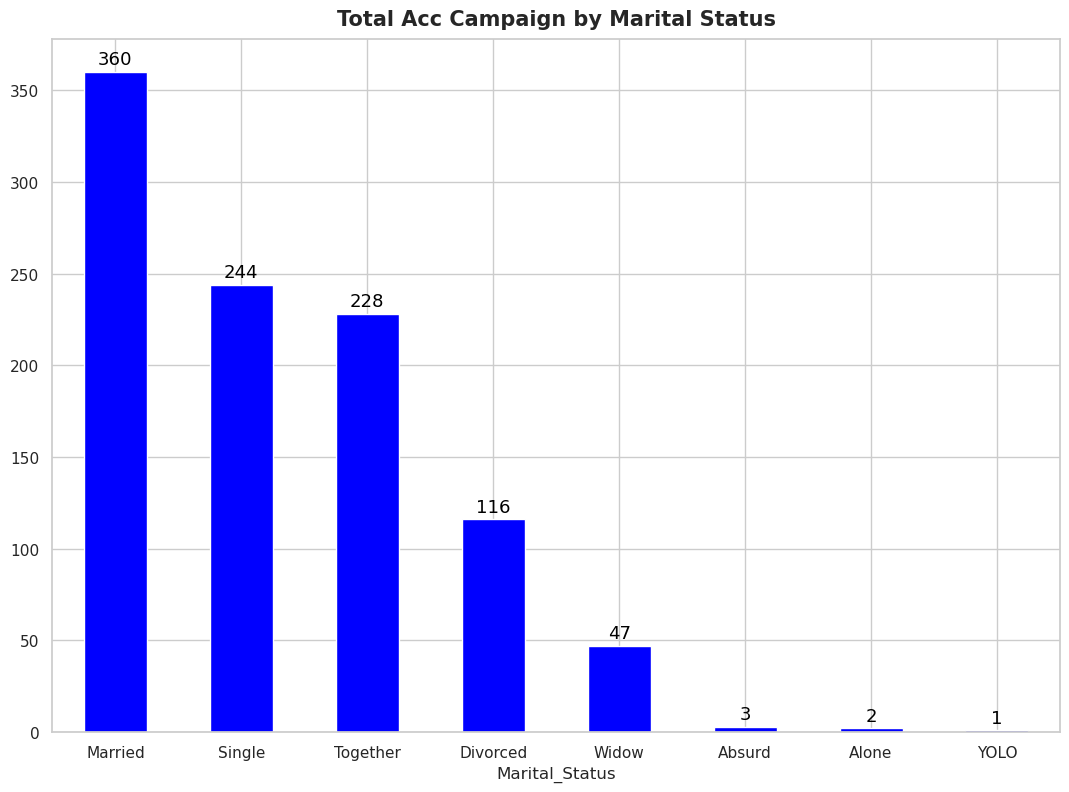

In [32]:
sns.set(style='whitegrid')
ax = data[['Marital_Status','Total_Acc_Cmp']].groupby('Marital_Status').sum().sort_values(by='Total_Acc_Cmp', ascending=False).plot(kind='bar', figsize=(13,9), legend=None, color='blue')
plt.xticks(rotation=360)
plt.title('Total Acc Campaign by Marital Status', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

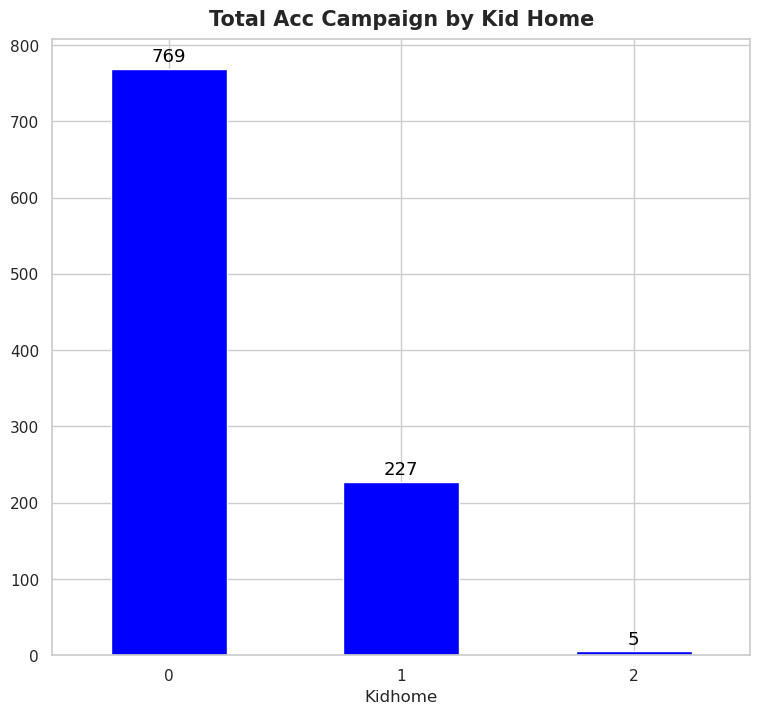

In [33]:
sns.set(style='whitegrid')
ax = data[['Kidhome','Total_Acc_Cmp']].groupby('Kidhome').sum().sort_values(by='Total_Acc_Cmp', ascending=False).plot(kind='bar', figsize=(9,8), legend=None, color='blue')
plt.xticks(rotation=360)
plt.title('Total Acc Campaign by Kid Home', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

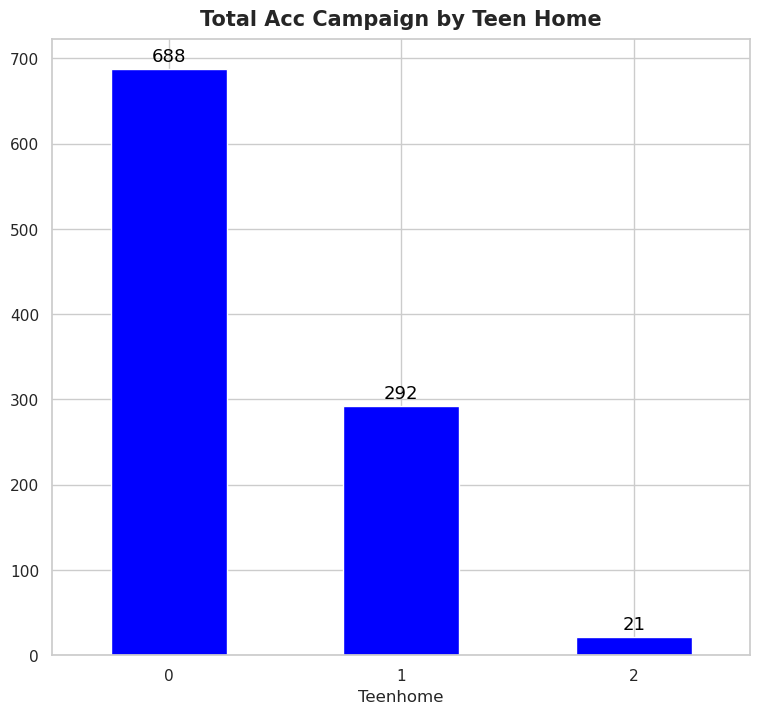

In [34]:
sns.set(style='whitegrid')
ax = data[['Teenhome','Total_Acc_Cmp']].groupby('Teenhome').sum().sort_values(by='Total_Acc_Cmp', ascending=False).plot(kind='bar', figsize=(9,8), legend=None, color='blue')
plt.xticks(rotation=360)
plt.title('Total Acc Campaign by Teen Home', pad=10, fontsize=15, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0,9), textcoords='offset points', color='black', fontsize=13)


<Axes: >

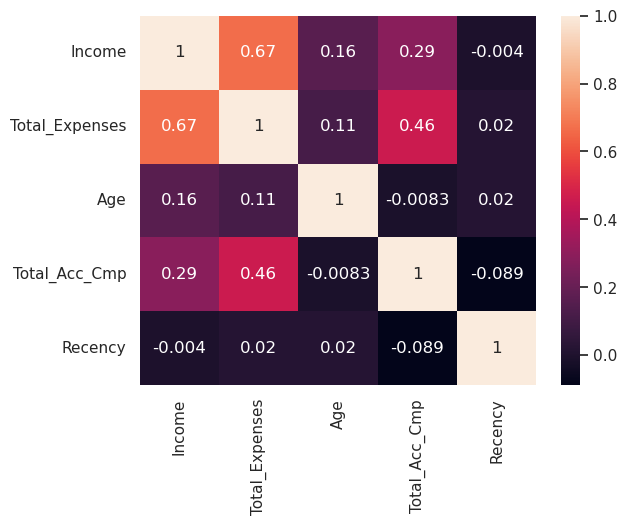

In [35]:
sns.heatmap(data[['Income', 'Total_Expenses','Age', 'Total_Acc_Cmp', 'Recency']].corr(), annot=True)

In [36]:
data['Income'].fillna(data['Income'].mean(), inplace=True)

In [37]:
data_prep = data.copy()

In [38]:
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()
lenc.fit(data_prep['Marital_Status'])
data_prep['Marital_Status'] = lenc.transform(data_prep['Marital_Status'])


from sklearn.preprocessing import OrdinalEncoder

edu = ['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD']
ore = OrdinalEncoder(categories=([edu]))
ore.fit(data_prep[['Education']])
data_prep['Education'] = ore.transform(data_prep[['Education']])


In [39]:
data_prep = data_prep.drop(['ID', 'Year_Birth', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response', 'Complain', 'Z_CostContact', 'Z_Revenue'], axis=1)
data_proc = data_prep.copy()

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_scaler = np.array(data_proc[['Income','Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age', 'Years_customer', 'Total_Expenses', 'Total_Acc_Cmp']]).reshape(-1,19)

scaler.fit(std_scaler)
data_proc[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age', 'Years_customer', 'Total_Expenses', 'Total_Acc_Cmp']] = scaler.transform(std_scaler)


## Clustering
Finally, down to clustering. In this case I’ll try using K-means and agglomerative clustering

#### K-means

In [42]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_proc)
    wcss.append(kmeans.inertia_)

/home/samar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/samar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/samar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/samar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

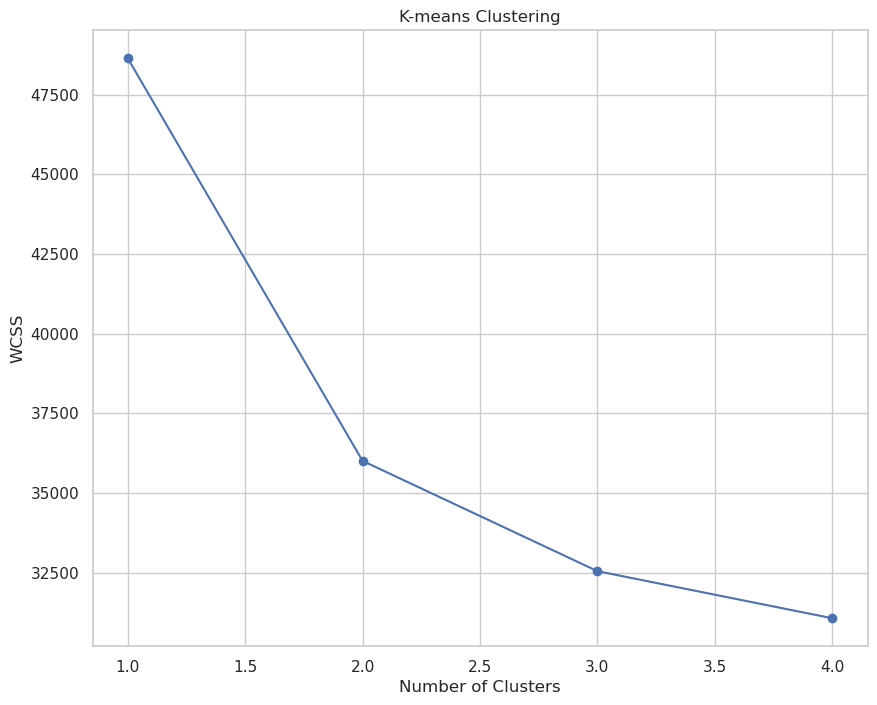

In [43]:
plt.figure(figsize = (10,8))
plt.plot(range(1,5), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [44]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_proc)
label = kmeans.predict(data_proc)
data_segment = data_prep.copy()
data_segment['Segments'] = label

/home/samar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
data_segment.groupby(['Segments']).mean()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Total_Expenses,Total_Acc_Cmp
Segments,,,,,,,,,,,,,,,,,,,,,
0,2.025584,3.740823,71960.342615,0.071190,0.432703,49.720801,609.016685,55.625139,360.890990,78.901001,...,76.605117,2.024472,5.784205,5.320356,8.558398,3.727475,53.994438,10.045606,1238.446051,0.808676
1,1.938106,3.722595,39031.689054,0.694258,0.555556,48.699478,99.410887,6.644295,36.932886,9.787472,...,22.178225,2.526473,2.945563,0.879940,3.934377,6.381805,50.987323,9.922446,181.674124,0.204325


In [48]:
data_segment['Labels'] = data_segment['Segments'].map({1:'well-off', 0:'fewer-opportunities'})

<Axes: xlabel='Income', ylabel='Total_Expenses'>

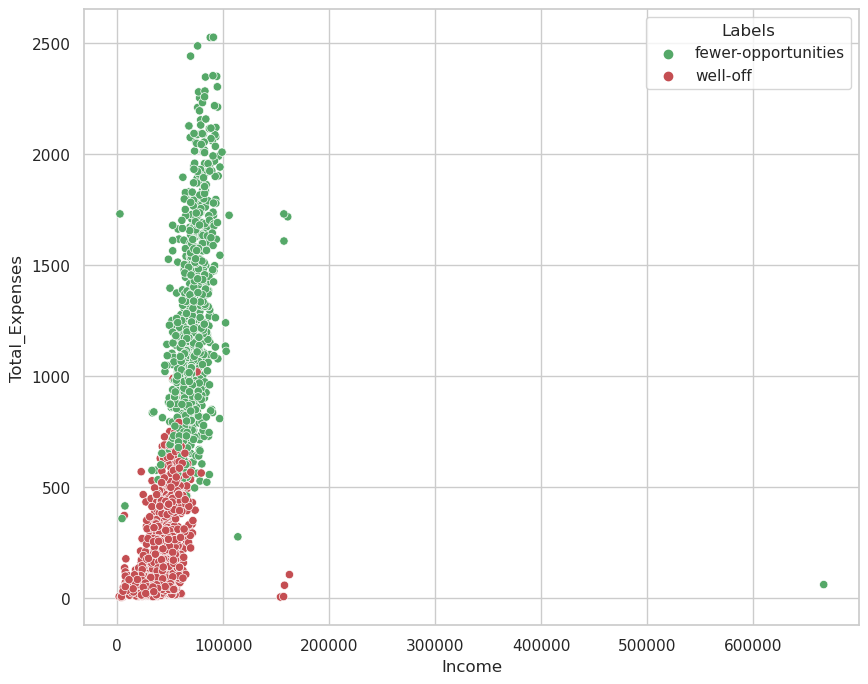

In [50]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data_segment, x='Income', y='Total_Expenses', hue='Labels', palette=['g', 'r'])

## Agglomerative

In [51]:
from sklearn.cluster import AgglomerativeClustering
agl =  AgglomerativeClustering(n_clusters=2)
agl.fit(data_proc)
label = agl.labels_
data_segment_3 = data_prep.copy()
data_segment_3['cluster'] = label
data_segment_3.groupby(['cluster']).mean()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Total_Expenses,Total_Acc_Cmp
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.992602,3.733662,43410.164935,0.588779,0.625771,48.784217,196.124538,10.342787,64.133785,14.970407,...,31.919852,2.643650,3.645499,1.469790,4.807645,6.197904,52.092478,9.964858,328.368064,0.256473
1,1.922330,3.720065,75441.028330,0.064725,0.192557,49.962783,586.896440,68.189320,436.800971,96.723301,...,75.784790,1.488673,5.237864,5.791262,8.368932,3.003236,52.461165,9.990291,1333.940129,0.946602


In [54]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for i in range(2, 10):
    agl = AgglomerativeClustering(n_clusters=i)
    agl.fit(data_proc)
    label = agl.labels_
    score = silhouette_score(data_proc, label)
    print("Untuk k =", i, "silhouette score =", score)


Untuk k = 2 silhouette score = 0.25833563130995013
Untuk k = 3 silhouette score = 0.16472260367988747
Untuk k = 4 silhouette score = 0.15281018836769622
Untuk k = 5 silhouette score = 0.07359997142084543
Untuk k = 6 silhouette score = 0.07596714651732925
Untuk k = 7 silhouette score = 0.0674938591777174
Untuk k = 8 silhouette score = 0.06762238571827839
Untuk k = 9 silhouette score = 0.06900890767676411
